In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt



In [402]:
data = np.load("./data-2013-2017-observed-filtered.npy").item()

In [403]:
selected_appliance = ['use', 'air1', 'refrigerator1','furnace1', 'clotheswasher1', 'dishwasher1',  'microwave1']

In [404]:
def create_tensor(year, data):
    raw_data = data[year]
    homeids = list(raw_data.keys())
    tensor = np.zeros((len(homeids), 7, 12))
    for idx, hid in enumerate(homeids):
        for i, app in enumerate(selected_appliance):
            tensor[idx][i] = raw_data[hid][app].values.T
    return tensor

In [405]:
all_tensor = {}
for year in [2013, 2014, 2015, 2016, 2017]:
    all_tensor[year] = create_tensor(year, data)

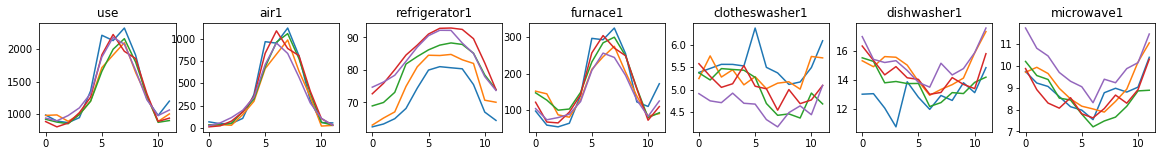

In [406]:
fig, axes = plt.subplots(ncols=7, nrows = 1, figsize=(20, 2))
ax = axes.flatten()

for i, app in enumerate(selected_appliance):
    
    for year in range(2013, 2018):
        pd.Series(all_tensor[year].mean(axis=0)[i]).plot(ax=ax[i])
    ax[i].set_title(app)

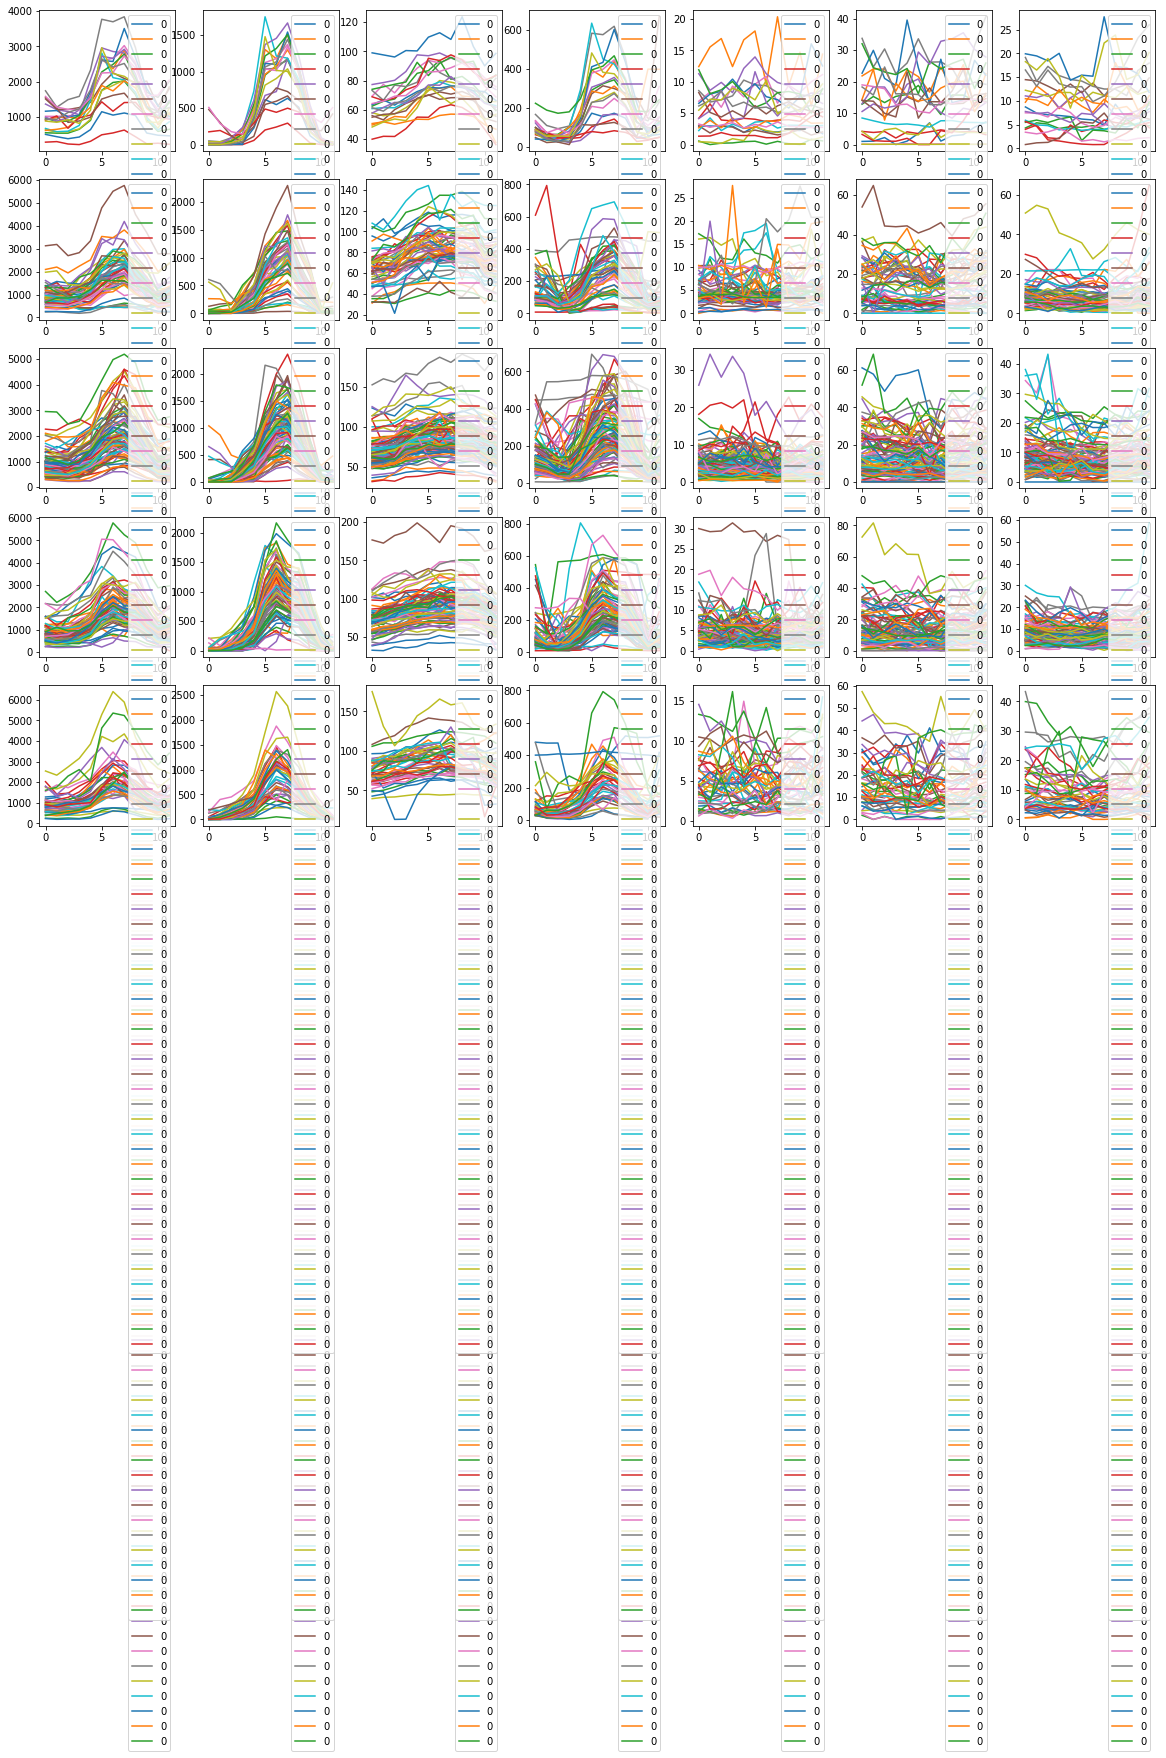

In [407]:
fig, axes = plt.subplots(ncols=7, nrows = 5, figsize=(20, 15))
ax = axes.flatten()
a=0

for year in range(2013, 2018):
    for i, app in enumerate(selected_appliance):
        for j in range(all_tensor[year].shape[0]):
            pd.DataFrame(all_tensor[year][j][i]).plot(ax=ax[a])
        a += 1

In [372]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [384]:
for year in range(2013, 2018):
    db = DBSCAN(eps=0.3, min_samples=10, metric='cosine', algorithm='brute').fit(all_tensor[year][:, 6])
    print(year)
    print(db.labels_)
    try:
        print(list(db.labels_).index(-1))
    except:
        continue

2013
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2014
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2015
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2016
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2017
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]


In [378]:
list(data[2016].keys())[12]

3482

In [398]:
year = 2016
pd.DataFrame(all_tensor[year][:, 4]).max(axis=1).nsmallest(2)

9     1.516980
22    1.554807
dtype: float64

In [401]:
print(list(data[year].keys())[22])
data[year][list(data[year].keys())[22]]

3500


,use,air1,clotheswasher1,dishwasher1,furnace1,microwave1,refrigerator1
localhour,,,,,,,
2016-01,1598.450562,2.746237,5.251904,14.779525,122.294510,13.904346,77.323677
2016-02,1195.065674,4.473180,4.376006,11.980843,56.481178,12.491643,79.204453
2016-03,1533.078369,25.191374,3.671384,12.267408,19.048159,11.182188,92.623718
2016-04,1749.195435,105.971573,5.940602,12.116713,32.581413,11.985718,89.187920
2016-05,2137.031738,307.424377,6.504189,11.180444,80.337097,11.103002,94.076836
2016-06,2847.780273,680.682434,4.758333,8.584236,164.416321,10.501041,95.033844
2016-07,3143.746826,910.033447,4.973298,9.814561,206.659256,10.549776,99.796211
2016-08,3226.444336,1039.879272,4.632818,12.522447,244.412201,11.539897,97.220543
2016-09,3063.044678,856.345764,5.904931,14.000139,217.213196,12.215023,95.978683


In [383]:
data[year].pop(3482)

,use,air1,clotheswasher1,dishwasher1,furnace1,microwave1,refrigerator1
localhour,,,,,,,
2016-01,561.606323,1.492137,2.328987,0.015636,28.488800,7.428562,52.027306
2016-02,432.285980,8.732375,0.673443,0.009746,19.779095,6.896408,54.428928
2016-03,635.343018,74.454041,2.886186,1.563792,51.389084,7.199326,59.249977
2016-04,715.046326,119.262108,1.553102,0.012477,69.056763,6.958495,59.105022
2016-05,808.207397,203.329346,1.468616,0.012612,108.459343,8.781362,61.612434
2016-06,1173.149902,439.461334,1.925972,0.013542,194.660370,7.894051,63.844330
2016-07,1288.611816,546.420776,0.890099,0.013441,227.582703,6.643974,63.357414
2016-08,999.253906,392.723053,0.991420,0.010730,176.299622,6.337276,64.503990
2016-09,1195.692993,427.807404,1.464606,0.015208,193.323334,6.707778,64.273888


In [408]:
c = 0
for i in range(2013, 2018):
    print(i, len(data[i].keys()))
    c+=len(data[i].keys())
print(c)

2013 19
2014 53
2015 93
2016 73
2017 44
282


In [421]:
error = {}
for year1 in range(2013, 2018):
    error[year1] = {}
    for year2  in range(2013, 2018):
        if year1 != year2:
#             error[year1][year2] = {}
            filename = "../code/error-{}-{}.npy".format(year1, year2)
            error[year1][year2] = np.load(filename, encoding='latin1').item()

In [422]:
pvalue = {}
for appliance in selected_appliance[1:]:
    pvalue[appliance] = {}
    for year1 in range(2013, 2018):
        pvalue[appliance][year1] = {}
        for year2  in range(2013, 2018):
            if year1 != year2:
                pvalue[appliance][year1][year2] = {}
                
from scipy import stats
for year1 in range(2013, 2018):
    for year2  in range(2013, 2018):
        if year1 != year2:
            for appliance in selected_appliance[1:]:
                
                statistic, pvalue[appliance][year1][year2] = stats.ttest_rel(pd.Series(error[year1][year2]['same'][appliance]).values, pd.Series(error[year1][year2]['diff'][appliance]).values )
                print(year1, year2, appliance)

2013 2014 air1
2013 2014 refrigerator1
2013 2014 furnace1
2013 2014 clotheswasher1
2013 2014 dishwasher1
2013 2014 microwave1
2013 2015 air1
2013 2015 refrigerator1
2013 2015 furnace1
2013 2015 clotheswasher1
2013 2015 dishwasher1
2013 2015 microwave1
2013 2016 air1
2013 2016 refrigerator1
2013 2016 furnace1
2013 2016 clotheswasher1
2013 2016 dishwasher1
2013 2016 microwave1
2013 2017 air1
2013 2017 refrigerator1
2013 2017 furnace1
2013 2017 clotheswasher1
2013 2017 dishwasher1
2013 2017 microwave1
2014 2013 air1
2014 2013 refrigerator1
2014 2013 furnace1
2014 2013 clotheswasher1
2014 2013 dishwasher1
2014 2013 microwave1
2014 2015 air1
2014 2015 refrigerator1
2014 2015 furnace1
2014 2015 clotheswasher1
2014 2015 dishwasher1
2014 2015 microwave1
2014 2016 air1
2014 2016 refrigerator1
2014 2016 furnace1
2014 2016 clotheswasher1
2014 2016 dishwasher1
2014 2016 microwave1
2014 2017 air1
2014 2017 refrigerator1
2014 2017 furnace1
2014 2017 clotheswasher1
2014 2017 dishwasher1
2014 2017 mic

In [425]:
pd.DataFrame(pvalue['microwave1'])

,2013,2014,2015,2016,2017
2013,NaN,0.000001,0.003130,0.000002,5.260586e-10
2014,8.126393e-07,NaN,0.065734,0.063394,5.161445e-01
2015,5.590792e-04,0.000150,NaN,0.260697,4.906156e-07
2016,6.221561e-05,0.000382,0.881941,NaN,1.609739e-05
2017,2.096843e-11,0.638474,0.000059,0.000027,NaN
